<a href="https://colab.research.google.com/github/Ahmethan96/Pytohn-Projects/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Need to run this to allow multiple ouputs

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Using a Tagger

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')

#Homonyms
text = nltk.word_tokenize("they like to play football every day in summer to enjoy")
nltk.pos_tag(text)
nltk.help.upenn_tagset('VBP')
nltk.help.upenn_tagset('NN')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

[('they', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('football', 'NN'),
 ('every', 'DT'),
 ('day', 'NN'),
 ('in', 'IN'),
 ('summer', 'NN'),
 ('to', 'TO'),
 ('enjoy', 'VB')]

VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


**Refuse** and **Permit** are verbs and nouns

### Tagged Corpora

Complete vs simplyfied (universal) tagging

In [ ]:
import nltk
nltk.download('brown')
nltk.download('universal_tagset')
print(nltk.corpus.brown.tagged_words())
nltk.corpus.brown.tagged_words(tagset='universal')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]


[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Tagging other languages

In [ ]:
import nltk
nltk.download('cess_esp')
nltk.corpus.cess_esp.tagged_words()

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

[('El', 'da0ms0'), ('grupo', 'ncms000'), ...]

Most common tags

In [ ]:
import pandas as pd
from nltk.corpus import brown
import matplotlib.pyplot as plt 
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
print (brown_news_tagged)
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.values())
tag_fd.keys()

list(tag_fd.most_common())

print(len(tag_fd))

print(len(brown_news_tagged))

data = pd.DataFrame(brown_news_tagged)

data.head()
print(data.shape)

plt.figure(figsize=(10,10))
data.head(10)
# class_distribution = tag_fd.value_counts()
# class_distribution.plot(kind='pie')


[('The', 'DET'), ('Fulton', 'NOUN'), ...]
dict_values([11389, 30654, 6706, 14399, 12355, 11928, 3349, 2717, 2264, 2535, 2166, 92])


dict_keys(['DET', 'NOUN', 'ADJ', 'VERB', 'ADP', '.', 'ADV', 'CONJ', 'PRT', 'PRON', 'NUM', 'X'])

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

12
100554


,0,1
0,The,DET
1,Fulton,NOUN
2,County,NOUN
3,Grand,ADJ
4,Jury,NOUN


(100554, 2)


<Figure size 720x720 with 0 Axes>

,0,1
0,The,DET
1,Fulton,NOUN
2,County,NOUN
3,Grand,ADJ
4,Jury,NOUN
5,said,VERB
6,Friday,NOUN
7,an,DET
8,investigation,NOUN
9,of,ADP


<Figure size 720x720 with 0 Axes>

### Mapping Words to Properties Using Python Dictionaries (Spanish Example)

In [ ]:
pos = {}
pos
pos['sin color'] = 'ADJ'
pos
pos['ideas'] = 'SUS'
pos['dormir'] = 'V'
pos['furiousamente'] = 'ADV'
pos
pos['ideas']
pos['sin color']

{}

{'sin color': 'ADJ'}

{'sin color': 'ADJ', 'ideas': 'SUS', 'dormir': 'V', 'furiousamente': 'ADV'}

'SUS'

'ADJ'

### Default Dictionary
Diccionary can automatically create am entry for new keys and give it a default value (0 or empty list)

In [ ]:
frequency = nltk.defaultdict(int)
frequency['colorless'] = 4
frequency['ideas']
pos = nltk.defaultdict(list)
pos['sleep'] = ['N','V']
print('\n')
pos['ideas']
print('\n')
pos['sleep']

0

[]

['N', 'V']

### Automatic Tagging

The Default Tagger. The simplest possible tagger assigns the same tag to each token (NN). Notice poor performance.

In [ ]:
import nltk
from nltk.corpus import brown
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)
brown_tagged_sents = brown.tagged_sents(categories='news')
print('\n Perc of Correctly tagged tokens -> ', round(default_tagger.evaluate(brown_tagged_sents)*100),'%')


[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  



 Perc of Correctly tagged tokens ->  13 %


Creating and evaluating lookup tagger with a range of sizes.
(Read 4.3   The Lookup Tagger in https://www.nltk.org/book/ch05.html)

---



['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'The', 'that', '``', 'is', 'was', "''", 'on', 'at', 'with', 'be', 'by', 'as', 'he', 'said', 'his', 'will', 'it', 'from', 'are', ';', 'an', 'has', '--', 'had', 'who', 'have', 'not', 'Mrs.', 'were', 'this', 'which', 'would', 'their', 'been', 'they', 'He', 'one', 'I', 'but', 'its', 'or', ')', 'more', 'Mr.', '(', 'up', 'all', 'out', 'last', 'two', 'other', ':', 'new', 'first', 'than', 'year', 'A', 'about', 'there', 'when', 'home', 'after', 'In', 'also', 'It', 'over', 'into', 'no', 'But', 'made', 'only', 'her', 'years', 'time', 'three', 'them', 'some', 'can', 'him', 'New', 'any', 'state', '?', 'President', 'before', 'week', 'could', 'under', 'against', 'we', 'what', 'now', 'most', 'if', 'off', 'four', 'man', 'House', 'such', 'This', 'back', 'members', 'so', 'here', 'American', 'may', 'program', 'work', 'get', 'Kennedy', 'John', 'school', 'night', 'did', 'State', 'do', 'They', 'meeting', 'since', 'per', 'each', 'day', 'many', 'these', 's

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  


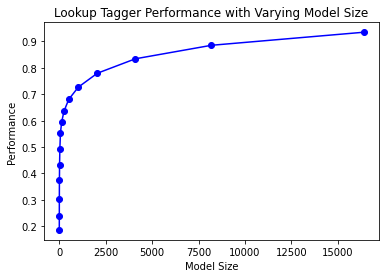

In [ ]:
import nltk
from nltk.corpus import brown
words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
print (words_by_freq)
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))
def display():
    import pylab
    words_by_freq = list(nltk.FreqDist(brown.words(categories='news')))
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

In [ ]:
# import nltk
# text = word_tokenize("And now for something completely different")
# nltk.pos_tag(text)

NameError: ignored

### N-Gram Tagging

Unigram Tagging. For each token, assign the tag that is most likely for that particular token. Training of a UNIGRAM tagger and evaluation


In [ ]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])
print('\n Perc of Correctly tagged tokens -> ', round(unigram_tagger.evaluate(brown_tagged_sents)*100),'%')

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  



 Perc of Correctly tagged tokens ->  93 %


Separating training and testing data sets. Notice the different scores between train (used to build system 90%) and test (not used while building the system 10%).

In [ ]:
size = int(len(brown_tagged_sents) * 0.75)
size
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
print('\n')
print('\n Perc of Correctly tagged tokens on training data -> ', round(unigram_tagger.evaluate(train_sents)*100),'%')
print('\n Perc of Correctly tagged tokens on testing data  -> ', round(unigram_tagger.evaluate(test_sents)*100),'%')

3467

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  import sys



 Perc of Correctly tagged tokens on training data ->  94 %

 Perc of Correctly tagged tokens on testing data  ->  81 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  


Bigram tagger. Notice perfomance difference between training and testing sentence.

In [ ]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)


print('\n')
print('\n Perc of Correctly tagged tokens on training data -> ', round(bigram_tagger.evaluate(train_sents)*100),'%')
print('\n Perc of Correctly tagged tokens on testing data  -> ', round(bigram_tagger.evaluate(test_sents)*100),'%')

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  



 Perc of Correctly tagged tokens on training data ->  79 %

 Perc of Correctly tagged tokens on testing data  ->  10 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  if __name__ == '__main__':


### Transformation Based Tagging

Brill tagging (Supervised Learning Method) -> Guess the tag for each word and go back and fix mistakes by applying rules. (see 6   Transformation-Based Tagging in https://www.nltk.org/book/ch05.html)



In [ ]:
import nltk

              
from nltk.tbl import demo as brill_tagger
brill_tagger.demo()


Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  